<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Make-a-new-map-from-map_dict" data-toc-modified-id="Make-a-new-map-from-map_dict-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Make a new map from map_dict</a></span></li><li><span><a href="#Read-the-lons/lats-from-the-MYD03-file" data-toc-modified-id="Read-the-lons/lats-from-the-MYD03-file-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the lons/lats from the MYD03 file</a></span></li><li><span><a href="#plot-the-lats-and-lons-on-a-map" data-toc-modified-id="plot-the-lats-and-lons-on-a-map-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>plot the lats and lons on a map</a></span></li><li><span><a href="#use-the-stored-data-to-make-a-new-map" data-toc-modified-id="use-the-stored-data-to-make-a-new-map-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>use the stored data to make a new map</a></span><ul class="toc-item"><li><span><a href="#Thumbnail-for-comparison" data-toc-modified-id="Thumbnail-for-comparison-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Thumbnail for comparison</a></span></li></ul></li></ul></div>

# Make a new map from map_dict

In the cartopy_mapping_pyproj notebook we stored projection
coords in a json file called corners.json.  This notebook
reads that information back in to plot lats/lons on a map

In [1]:
import a301
import json
from a301.utils.data_read import download
import a301
import pprint
import shutil
from pyhdf.SD import SD, SDC
import json
import pprint
import cartopy

read_data=False
if read_data:
    filename_M3='MYD03.A2013222.2105.006.2013223155808.hdf'
    download(filename_M3)
    for filename in [filename_M3,filename_M2]:
        local_file = Path.cwd() / Path(filename)
        to_file = a301.data_dir / Path(filename)
        print(f'copy {local_file} to {to_file}')
        shutil.copy(local_file,to_file)


data directory a301.data_dir = /Users/phil/repos/a301_code/data



In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
from pathlib import Path
import pprint
import numpy as np
import pdb
#

# Read the lons/lats from the MYD03 file

**substitute your filename**

In [3]:
# Read the lats and lons from the MYD03 file
filename_M3='MYD03.A2013222.2105.006.2013223155808.hdf'
m3_path= a301.data_dir / Path(filename_M3)
print(f'reading {m3_path}')
m3_file = SD(str(m3_path), SDC.READ)
lats = m3_file.select('Latitude').get()
lons = m3_file.select('Longitude').get()

reading /Users/phil/repos/a301_code/data/MYD03.A2013222.2105.006.2013223155808.hdf


# plot the lats and lons on a map

Get the map  projection and extent from corners.json

In [4]:
json_file = a301.data_dir / Path('corners.json')
with open(json_file,'r') as f:
    map_dict=json.load(f)
pprint.pprint(map_dict)

{'extent': [-1285873.5967137816,
            1561347.9917805532,
            -1179100.5032042824,
            1297248.5261361937],
 'lats': [32.13645206898284,
          28.687374622563773,
          45.73346985640787,
          50.510827489422674,
          32.13645206898284],
 'lons': [-104.77089390290801,
          -129.005397891393,
          -138.038848796623,
          -107.001718605882,
          -104.77089390290801],
 'proj4_params': {'datum': 'WGS84',
                  'ellps': 'WGS84',
                  'lat_0': 39.59910106367865,
                  'lon_0': -121.4048713497655,
                  'proj': 'laea',
                  'x_0': 0.0,
                  'y_0': 0.0},
 'proj4_string': '+datum=WGS84 +ellps=WGS84 +proj=laea '
                 '+lon_0=-121.4048713497655 +lat_0=39.59910106367865 +x_0=0.0 '
                 '+y_0=0.0 +no_defs',
 'xcoords': [1561347.9917805532,
             -744961.1366254934,
             -1285873.5967137816,
             1019738.9399581843,
   

# use the stored data to make a new map

In [5]:
globe_w = ccrs.Globe(datum=map_dict['proj4_params']['datum'],
                     ellipse=map_dict['proj4_params']['ellps'])
projection_w=ccrs.LambertAzimuthalEqualArea(central_latitude=map_dict['proj4_params']['lat_0'],
                                          central_longitude= map_dict['proj4_params']['lon_0'],globe=globe_w)

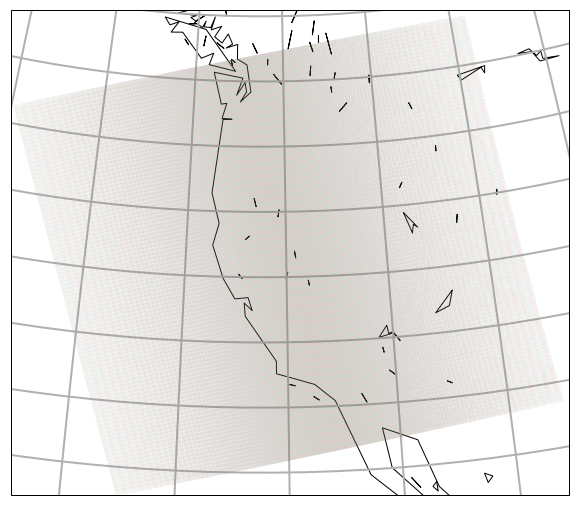

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10),
                       subplot_kw={'projection': projection_w})
ax.set_extent(map_dict['extent'],projection_w)
xy_vals = projection_w.transform_points(cartopy.crs.Geodetic(),lons,lats)
xcoords = xy_vals[:,:,0]
ycoords = xy_vals[:,:,1]
ax.plot(xcoords,ycoords,alpha=0.05)
ax.gridlines(linewidth=2)
ax.add_feature(cartopy.feature.GSHHSFeature(scale='coarse', levels=[1,2,3]));

## Thumbnail for comparison

<img src="images/myd2105.jpg" width=400>

